In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import sklearn.metrics.pairwise 
import scipy
%matplotlib inline
plt.style.use(['ggplot'])


In [ ]:
# source policy 
Ks =  np.array([[0.00334441, 0.0], [0.0, 0.10033222]])

# Testing Reflections

In [3]:
N = 10
X = np.random.randint(1, 51, (N, 2)) # (2 X N)
print(X)

[[31 45]
 [21 36]
 [13 17]
 [28  9]
 [23 44]
 [ 8 12]
 [39  4]
 [ 4 21]
 [ 2 21]
 [18 23]]


In [4]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        #theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        #theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history#, theta_history

# Reflection vs Translation

In [32]:
op = ['x_trans','x_ref']
R = {
    'x_ref': np.array([[1.0, 0.0], 
                       [0.0, -1.0]]),  # reflection on x ais
    
    'y_ref': np.array([[-1.0, 0.0], 
                        [0.0, 1.0]]),  # reflection on y axis
    
    'y=x_ref': np.array([[0.0, 1.0], 
                        [1.0, 0.0]]),  # reflection on y=x
    
    'y=-x_ref': np.array([[0.0, -1.0], 
                        [-1.0, 0.0]]),  # reflection on y=-x
    
    'origin_ref': np.array([[-1.0, 0.0], 
                         [0.0, -1.0]]), # reflection on origin 
    
    'x_trans': np.array([[-1.0, 0.0], 
                        [0.0, 0.0]]), 

}

lr = 0.001
n_iter = 100
tolerance  = 0.001

# source policy
Ks = np.eye(2)
#Ks = np.array([[0.001, -3.0], [0.0, 0.348]])
us = X@Ks.T 

# translated target policy
K_rot = R[op[0]] + Ks  
u_rot = X@K_rot.T 

# reflected target policy
K_ref = R[op[1]] @ Ks  
u_ref = X@K_ref.T 

# print("src u: ", us[0])
print("trans: \n", K_rot,"\n\n u:", u_rot[0])
print("\nref: \n", K_ref, "\n\n u:", u_ref[0])

theta_rot, cost_history_rot = gradient_descent(X, u_rot, Ks, lr, n_iter)
theta_ref, cost_history_ref = gradient_descent(X, u_ref, Ks, lr, n_iter)
print("theta trans: ", theta_rot)
rot_steps = np.where(cost_history_rot <= tolerance)[0][0]
ref_steps = np.where(cost_history_ref <= tolerance)[0][0]

n_gradient_steps = [rot_steps, ref_steps]
n_gradient_steps

trans: 
 [[0. 0.]
 [0. 1.]] 

 u: [ 0. 45.]

ref: 
 [[ 1.  0.]
 [ 0. -1.]] 

 u: [ 31. -45.]


[50, 52]

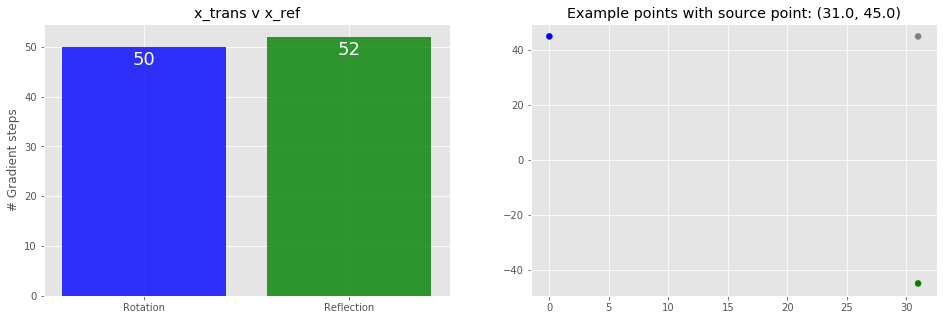

In [33]:
# Plotting sample complexity

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axs[0].annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height-5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            fontsize=18,
            color="white",
            ha='center', va='bottom')
        

fig,axs = plt.subplots(1,2,figsize=(16,5))
x = [i for i in range(2)]
axs[0].set_title("{} v {}".format(op[0], op[1]))
axs[0].set_ylabel('# Gradient steps')
axs[0].set_xticks(x)
axs[0].set_xticklabels(['Rotation', 'Reflection'])

bar = axs[0].bar(x, n_gradient_steps, color=['b', 'g'], alpha=0.8)
autolabel(bar)

axs[1].set_title("Example points with source point: ({}, {})".format(us[0][0], us[0][1]))
axs[1].scatter(x=[us[0][0], u_rot[0][0], u_ref[0][0]], 
           y = [us[0][1], u_rot[0][1], u_ref[0][1]], 
           c=['grey', 'b', 'g'])

#plt.savefig("output/matmul/{},{}.pdf".format(op[0], op[1]), bbox_inches='tight')

# Reflection vs Rotation

In [186]:
op = ['270_rot','x_ref']
R = {
    'x_ref': np.array([[1.0, 0.0], 
                       [0.0, -1.0]]),  # reflection on x ais
    
    'y_ref': np.array([[-1.0, 0.0], 
                        [0.0, 1.0]]),  # reflection on y axis
    
    'y=x_ref': np.array([[0.0, 1.0], 
                        [1.0, 0.0]]),  # reflection on y=x
    
    'y=-x_ref': np.array([[0.0, -1.0], 
                        [-1.0, 0.0]]),  # reflection on y=-x
    
    'origin_ref': np.array([[-1.0, 0.0], 
                         [0.0, -1.0]]), # reflection on origin 
    
    '0_rot': np.eye(2),

    
    '90_rot': np.array([[0.0, -1.0], 
                        [1.0, 0.0]]), 
    
    '180_rot': np.array([[-1.0, 0.0], 
                         [0.0, -1.0]]),
    
    '270_rot': np.array([[0.0, 1.0], 
                        [-1.0, 0.0]]),
}

lr = 0.001
n_iter = 100
tolerance  = 0.001

# source policy
#Ks = np.eye(2)
Ks = np.array([[0.001, -3.0], [0.0, 0.348]])
us = X@Ks.T 

# rotated target policy
K_rot = R[op[0]] @ Ks  
u_rot = X@K_rot.T 

# reflected target policy
K_ref = R[op[1]] @ Ks  
u_ref = X@K_ref.T 

# print("src u: ", us[0])
# print("rot u: ", u_rot[0])
# print("ref u: ", u_ref[0])

theta_rot, cost_history_rot = gradient_descent(X, u_rot, Ks, lr, n_iter)
theta_ref, cost_history_ref = gradient_descent(X, u_ref, Ks, lr, n_iter)

rot_steps = np.where(cost_history_rot <= tolerance)[0][0]
ref_steps = np.where(cost_history_ref <= tolerance)[0][0]

n_gradient_steps = [rot_steps, ref_steps]
n_gradient_steps

[25, 30]

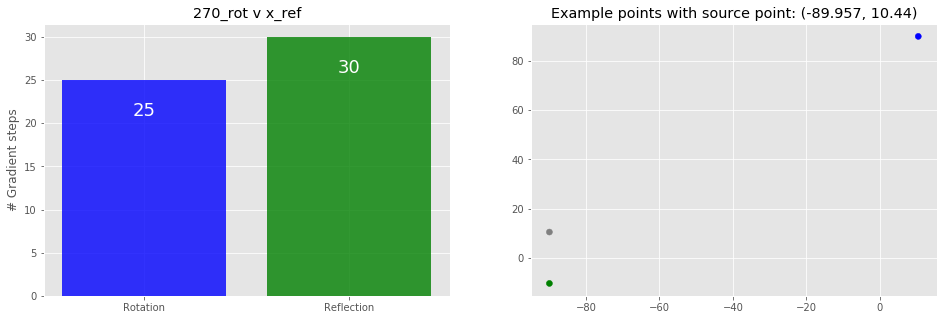

In [187]:
# Plotting sample complexity

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axs[0].annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height-5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            fontsize=18,
            color="white",
            ha='center', va='bottom')
        

fig,axs = plt.subplots(1,2,figsize=(16,5))
x = [[i for i in range(2)] for _ in range(n_Ks)]
axs[0].set_title("{} v {}".format(op[0], op[1]))
axs[0].set_ylabel('# Gradient steps')
axs[0].set_xticks(x[0])
axs[0].set_xticklabels(['Rotation', 'Reflection'])

bar = axs[0].bar(x[0], n_gradient_steps, color=['b', 'g'], alpha=0.8)
autolabel(bar)

axs[1].set_title("Example points with source point: ({}, {})".format(us[0][0], us[0][1]))
axs[1].scatter(x=[us[0][0], u_rot[0][0], u_ref[0][0]], 
           y = [us[0][1], u_rot[0][1], u_ref[0][1]], 
           c=['grey', 'b', 'g'])

#plt.savefig("output/matmul/{},{}.pdf".format(op[0], op[1]), bbox_inches='tight')

# Operation vs No Op (Fine-tune vs Direct)

In [35]:
#np.random.seed(seed=1)
op = '-45_ref'
R = {
    '0_ref': np.array([[1.0, 0.0], [0.0, -1.0]]),
    '90_ref': np.array([[-1.0, 0.0], [0.0, 1.0]]), 
    '45_ref': np.array([[0.0, 1.0], [1.0, 0.0]]),
    '-45_ref': np.array([[0.0, -1.0], [-1.0, 0.0]]),
    
    '0_rot': np.eye(2),
    
    '45_rot': np.array([[1.0, -1.0], 
                        [1.0, 1.0]]),
    
    '90_rot': np.array([[0.0, -1.0], 
                        [1.0, 0.0]]), 
    
    '180_rot': np.array([[-1.0, 0.0], 
                         [0.0, -1.0]]),
}

lr = 0.001
n_iter = 100
n_Ks = 1000
tolerance  = 0.001
n_gradient_steps = np.zeros((n_Ks, 2))

for i in range(n_Ks):
    # source policy
    Ks = np.eye(2)
    us = X@Ks.T 

    # target policy
    Kt = R[op] @ Ks  
    ut = X@Kt.T 
        
    theta_random = np.random.randn(2,2)
    theta_t, cost_history_t = gradient_descent(X, ut, theta_random, lr, n_iter)
    theta_st, cost_history_st = gradient_descent(X, ut, Ks, lr, n_iter)
    t_steps = np.where(cost_history_t <= tolerance)[0][0]
    st_steps = np.where(cost_history_st <= tolerance)[0][0]
    
    n_gradient_steps[i,:] = [st_steps, t_steps]

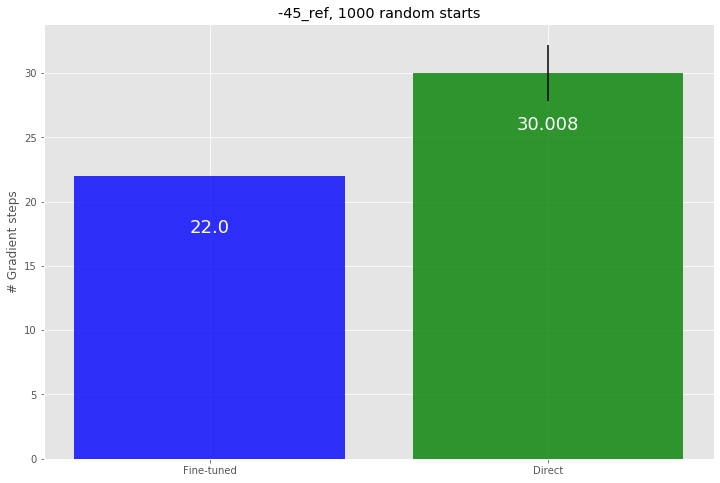

In [36]:
# Plotting sample complexity

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height-5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            fontsize=18,
            color="white",
            ha='center', va='bottom')
        

fig,ax = plt.subplots(figsize=(12,8))
x = [[i for i in range(2)] for _ in range(n_Ks)]
ax.set_title("{}, {} random starts".format(op, n_Ks))
ax.set_ylabel('# Gradient steps')
ax.set_xticks(x[0])
ax.set_xticklabels(['Fine-tuned', 'Direct'])

bar = ax.bar(x[0], np.mean(n_gradient_steps, axis=0), yerr=np.std(n_gradient_steps, axis=0), color=['b', 'g'], alpha=0.8)
autolabel(bar)

#plt.savefig("output/matmul/{}.pdf".format(op), bbox_inches='tight')

# Extra code 

In [ ]:
N = 10
reflection = '45_ref'
R = {
    '0_ref': np.eye(2),
    '90_ref': np.array([[-1.0, 0.0], [0.0, 1.0]]), 
    '45_ref': np.array([[0.0, 1.0], [1.0, 0.0]]),
    '-45_ref': np.array([[0.0, -1.0], [-1.0, 0.0]])
}
ep = 0.001

# gradient descent params
lr = 0.001
n_iter = 100
n_Ks = 1

diff = np.zeros((n_Ks, 2))
for i in range(n_Ks):
    # source policy
    #Ks = np.random.uniform(-1, 1.1, (2,2))
    #Ks =  np.array([[0.00334441, 0.0], [0.0, 0.10033222]])
    Ks = np.eye(2)
    us = X @ Ks

    # target policy
    Kt = Ks @ R[reflection]
    ut = X @ Kt
        
    theta_random = np.random.randn(2,2)
    theta_t, cost_history_t = gradient_descent(X, ut, theta_random, lr, n_iter)
    theta_st, cost_history_st = gradient_descent(X, ut, Ks, lr, n_iter)

    st_steps = np.where(cost_history_st <= ep)[0][0]
    t_steps = np.where(cost_history_t <= ep)[0][0]
    diff[i, :] = [st_steps, t_steps]
    
    Ur, Sr, VTr = np.linalg.svd(theta_random)
    Ut, St, VTt = np.linalg.svd(Kt)
    Us, Ss, VTs = np.linalg.svd(Ks)

    print("cosine similarity between eigenvectors")
    for U in [Ur, Us]:
        print("\n")
        for idx in range(U.shape[1]):
            cosine_sim = sklearn.metrics.pairwise.cosine_similarity([U[idx,:]], [Ut[idx,:]])[0][0]
            #cosine_dist = scipy.spatial.distance.cosine(U[idx,:], Ut[idx, :])
            print(idx, cosine_sim)
            #print("sim: ", 1.0-cosine_dist)
    #random_opt = np.linalg.norm(theta_random-Kt)
    #source_opt = np.linalg.norm(Ks-Kt)


In [ ]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height-5),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            fontsize=18,
            color="white",
            ha='center', va='bottom')
        

fig,ax = plt.subplots(figsize=(12,8))
x = [[i for i in range(2)] for _ in range(n_Ks)]
ax.set_title("{}, {} random starts".format(reflection, n_Ks))
ax.set_ylabel('# Gradient steps')
ax.set_xticks(x[0])
ax.set_xticklabels(['Fine-tuned', 'Direct'])

bar =ax.bar(x[0], np.mean(diff, axis=0), yerr=np.std(diff, axis=0), color=['b', 'g'], alpha=0.8)
autolabel(bar)

In [ ]:
#np.random.seed(seed=1)
reflection = '0_ref'
R = {
    '0_ref': np.array([[1.0, 0.0], [0.0, -1.0]]),
    '90_ref': np.array([[-1.0, 0.0], [0.0, 1.0]]), 
    '45_ref': np.array([[0.0, 1.0], [1.0, 0.0]]),
    '-45_ref': np.array([[0.0, -1.0], [-1.0, 0.0]]),
    
    '0_rot': np.eye(2),
    
    '45_rot': np.array([[1.0, -1.0], 
                        [1.0, 1.0]]),
    
    '90_rot': np.array([[0.0, -1.0], 
                        [1.0, 0.0]]), 
    
    '180_rot': np.array([[-1.0, 0.0], 
                         [0.0, -1.0]]),
}

lr = 0.001
n_iter = 100
n_Ks = 1
ep = 0.001


diff = np.zeros((n_Ks, 2))
for i in range(n_Ks):
    # source policy
    #Ks = np.random.uniform(-1, 1.1, (2,2))
    #Ks =  np.array([[0.00334441, 0.0], [0.0, 0.10033222]])
    Ks = np.eye(2)
    us = Ks @ X  # (2 x N)
    assert ((us == Ks.dot(X)).all())

    # target policy
    Kt = R[reflection] @ Ks  
    ut = Kt @ X  # (2 x N)
    assert (us.shape == ut.shape == (2,N))
        
    theta_random = np.random.randn(2,2)
    theta_t, cost_history_t = gradient_descent(X.T, ut.T, theta_random, lr, n_iter)
    print(theta_t)
    print("\nGT theta: ",  Kt)
    print("GT ut: ", ut)
    print(cost_history_t[-1])
    
    
#     theta_st, cost_history_st = gradient_descent(X, ut, Ks, lr, n_iter)
    
#     st_steps = np.where(cost_history_st <= ep)[0][0]
#     t_steps = np.where(cost_history_t <= ep)[0][0]
    
#     diff[i, :] = [st_steps, t_steps]

